# Reference Link
https://www.kaggle.com/yashvi/vehicle-insurance-eda-and-boosting-models

https://www.kaggle.com/roshankumarg/rank-10-solution-cross-sell-prediction-hackathon

https://www.kaggle.com/isaienkov/insurance-prediction-eda-and-modeling-acc-88

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import holoviews as hv

# Testing
import scipy
import scipy.stats as st

# hv.extension('bokeh')

%matplotlib inline

In [2]:
print('Numpy Version : ' + np.__version__)
print('Pandas Version : ' + pd.__version__)
print('Matplotlib Version : ' + matplotlib.__version__)
print('Seaborn Version : ' + sns.__version__)
print('Scipy Version : ' + scipy.__version__)

Numpy Version : 1.19.2
Pandas Version : 1.1.3
Matplotlib Version : 3.3.2
Seaborn Version : 0.11.0
Scipy Version : 1.5.2


<h1>DATA DESCRIPTION</h1>

In [3]:
from IPython.display import Image

Image(url= "archive/data-description.png", width=1000)

In [4]:
train = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Target Output : Feature <strong>RESPONSE</strong>

<h1>DATA CLEANING</h1>

In [5]:
train.shape

(381109, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
# Finding Missing Value
data_missing_value = train.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value = data_missing_value[data_missing_value['missing_value'] > 0]

data_missing_value

,feature,missing_value


In [9]:
# Finding Duplicates
train.duplicated().sum()

0

In [10]:
#Invalid Value
display(train.select_dtypes(include=['object']).columns)
print(train.select_dtypes(include=object).shape)
data_cat = train.select_dtypes(include=['object'])

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

(381109, 3)


In [11]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [12]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [13]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [14]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(train.select_dtypes(include=numerics).columns)
print(train.select_dtypes(include=numerics).shape)
data_num = train.select_dtypes(include=numerics)

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

(381109, 9)


In [15]:
train[['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [16]:
train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


<h1>EXPLORATORY DATA ANALYST</h1>

In [17]:
trainGroup = train.loc[:, train.columns.intersection(['id', 'Response'])]
trainGroup['Age-Group'] = train['Age'].apply(lambda x : '> 50' if x > 50 else ('36 - 50' if (x > 35) and (x < 51) else '20-35'))
trainGroup['Vintage-Group'] = train['Vintage'].apply(lambda x : '0-100' if x < 100 else ('100 - 200' if (x > 100) and (x < 200) else '200 - 300'))
trainGroup['Annual_Premium-Group'] = train['Annual_Premium'].apply(lambda x : '> 450K' if x > 450000 else ('150K - 450K' if (x > 150000) and (x < 450001) else '0 - 150K'))

trainGroup

,id,Response,Age-Group,Vintage-Group,Annual_Premium-Group
0,1,1,36 - 50,200 - 300,0 - 150K
1,2,0,> 50,100 - 200,0 - 150K
2,3,1,36 - 50,0-100,0 - 150K
3,4,0,20-35,200 - 300,0 - 150K
4,5,0,20-35,0-100,0 - 150K
...,...,...,...,...,...
381104,381105,0,> 50,0-100,0 - 150K
381105,381106,0,20-35,100 - 200,0 - 150K
381106,381107,0,20-35,100 - 200,0 - 150K
381107,381108,0,> 50,0-100,0 - 150K


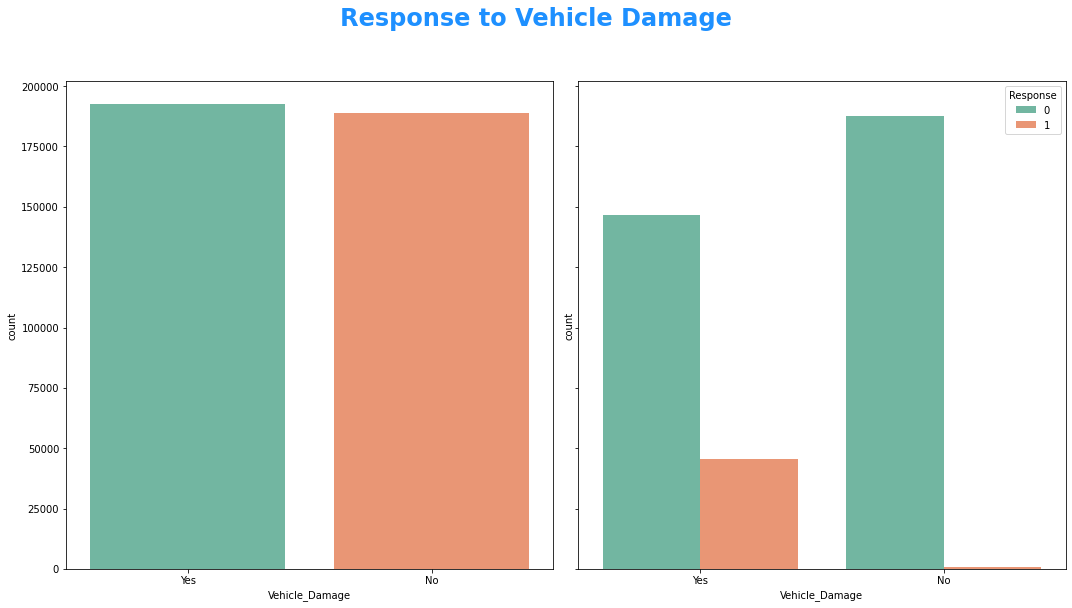

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g = sns.countplot(train['Vehicle_Damage'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Vehicle_Damage'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Vehicle Damage',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout();

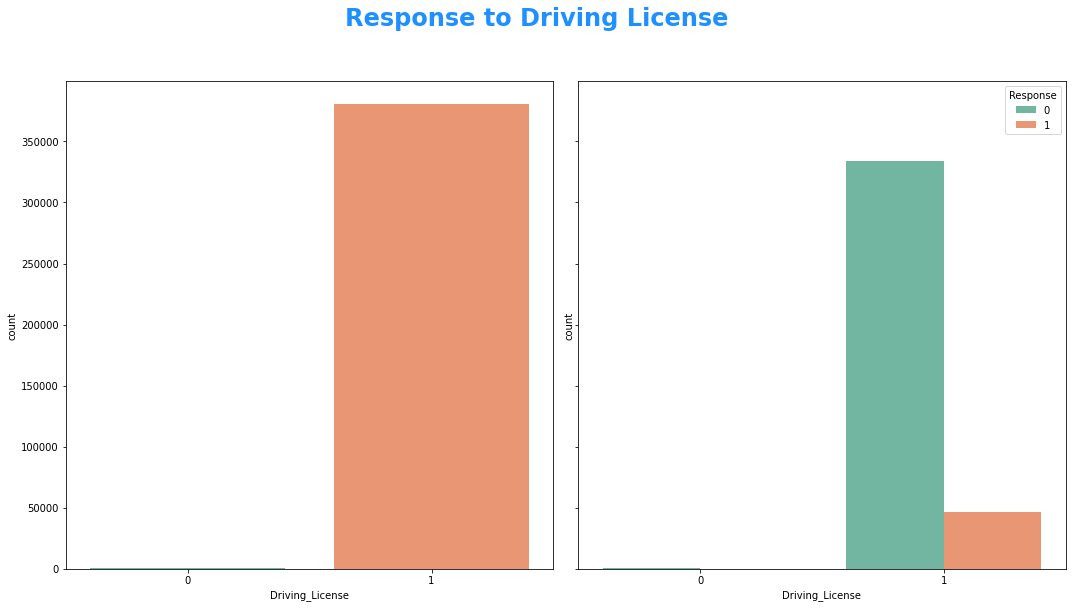

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g = sns.countplot(train['Driving_License'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Driving_License'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Driving License',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout();

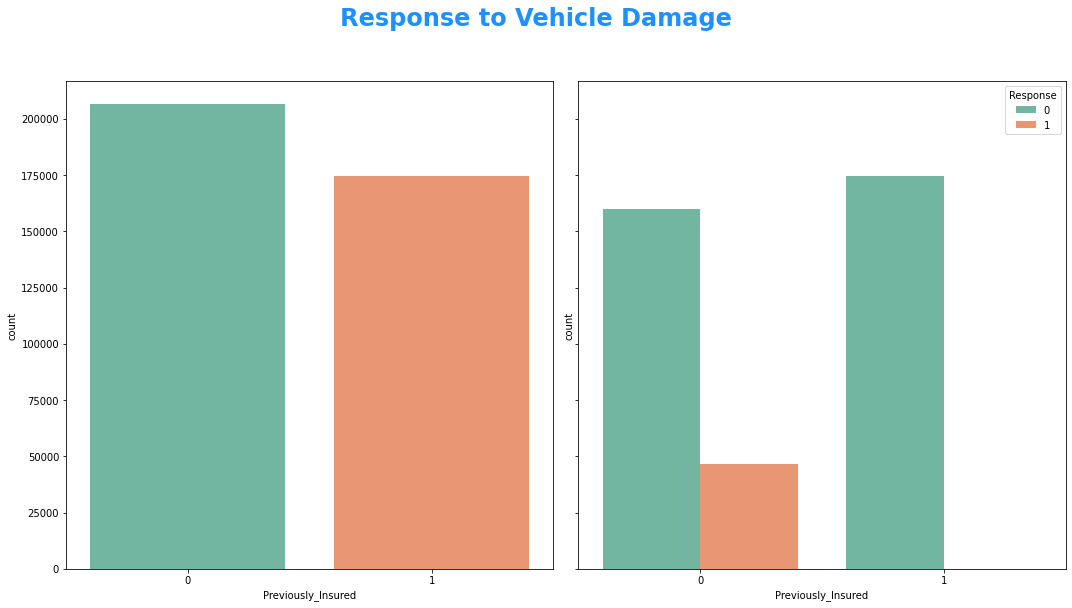

In [20]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)
# 
g = sns.countplot(train['Previously_Insured'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Previously_Insured'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Vehicle Damage',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout();

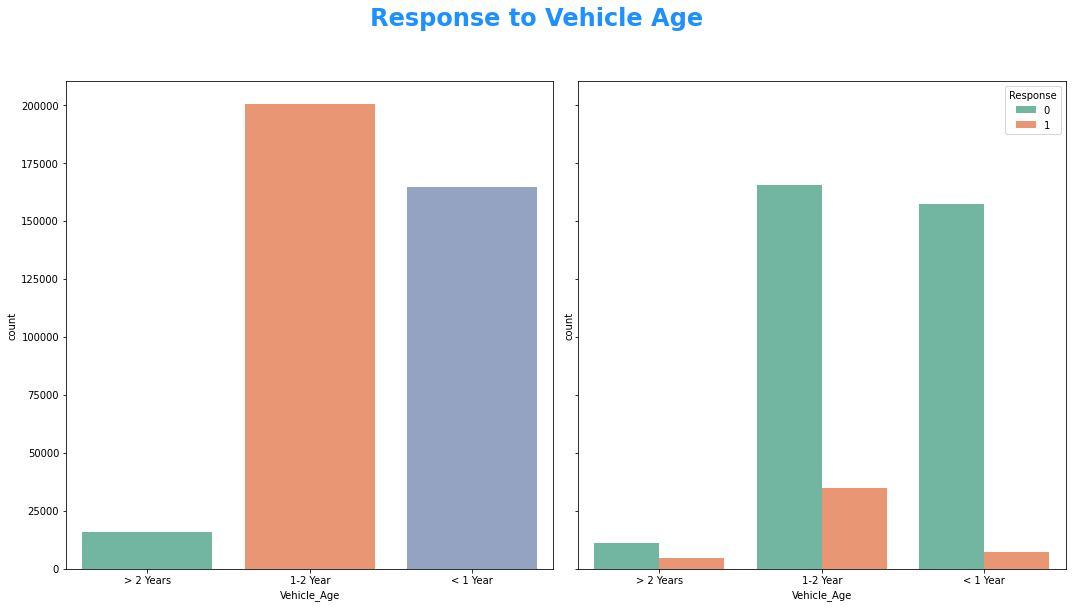

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g = sns.countplot(train['Vehicle_Age'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Vehicle_Age'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Vehicle Age',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout();

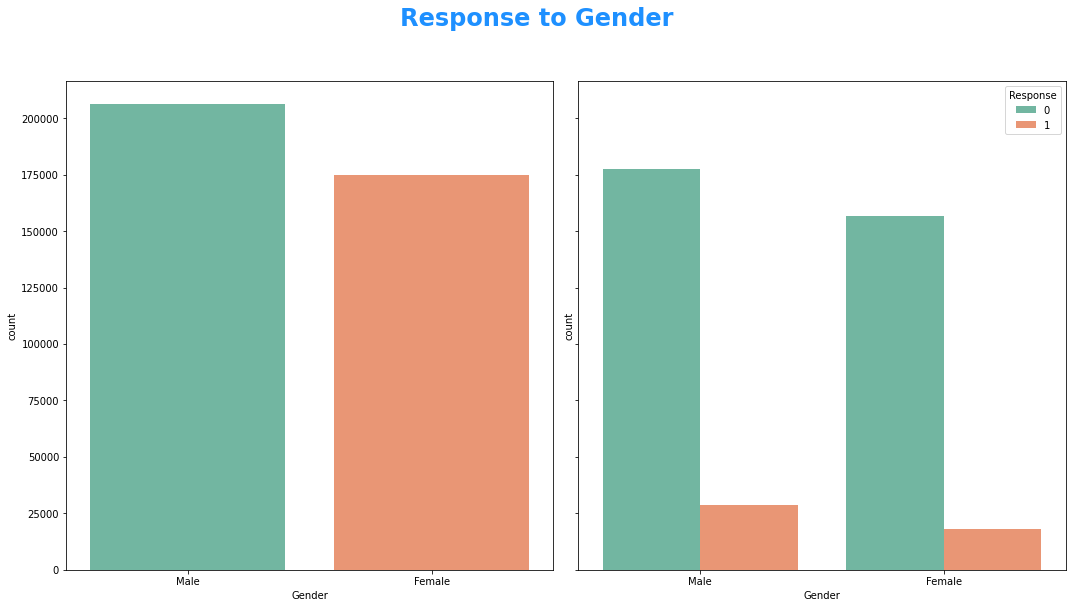

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g = sns.countplot(train['Gender'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Gender'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Gender',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout();

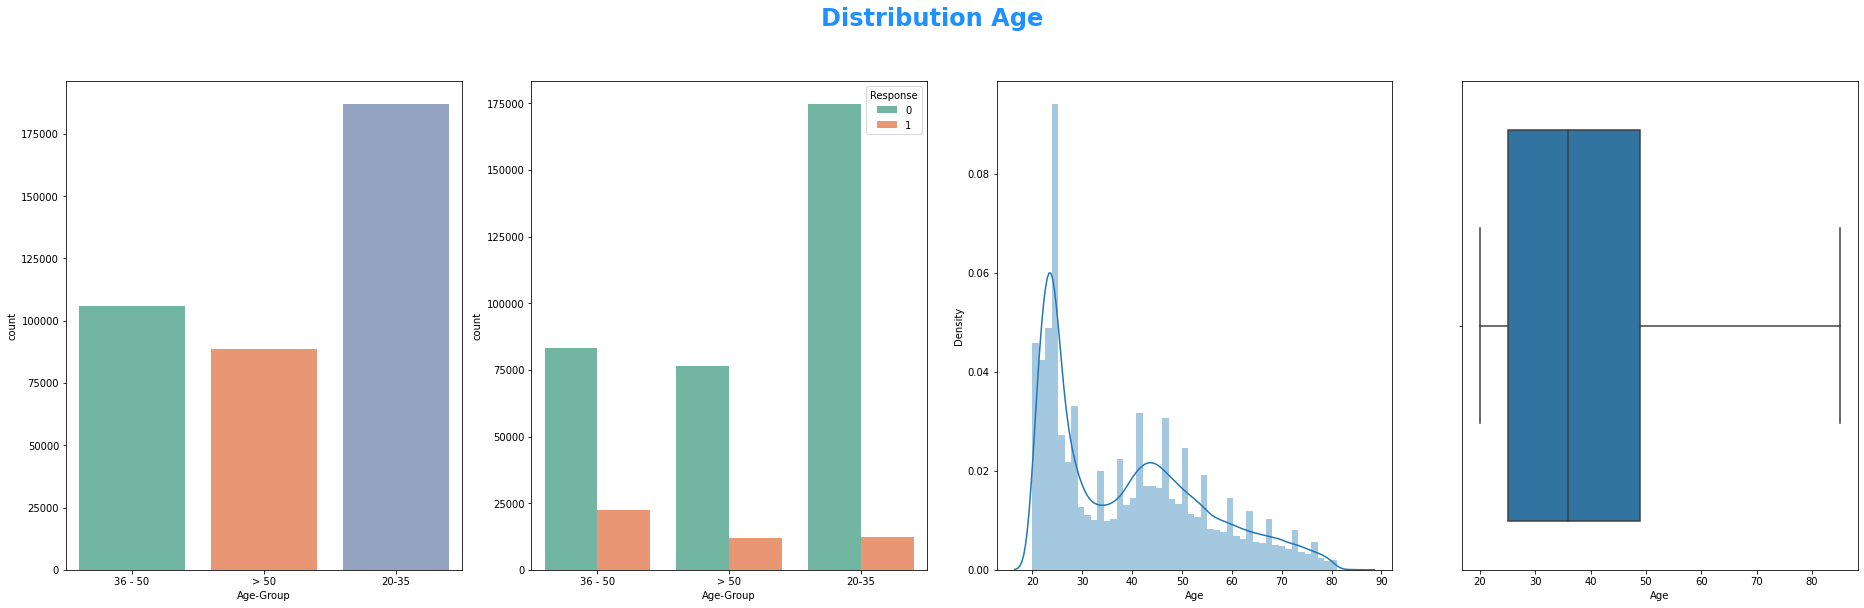

In [23]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

g = sns.countplot(trainGroup['Age-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(trainGroup['Age-Group'], hue = trainGroup['Response'],palette=sns.color_palette("Set2"), ax=ax[1])
g = sns.distplot(train['Age'], ax=ax[2])
g = sns.boxplot(train['Age'], orient='v', ax=ax[3])

plt.suptitle('Distribution Age',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout();

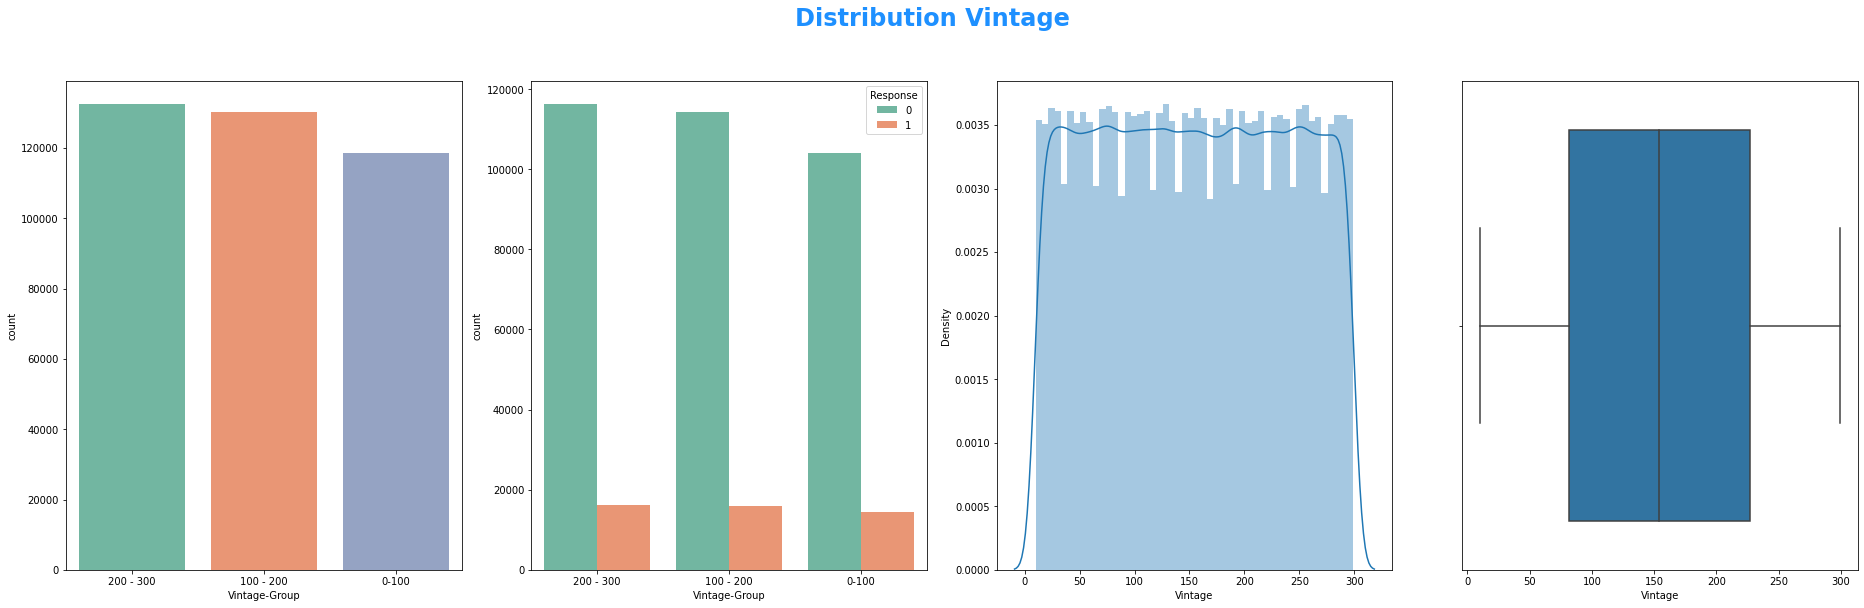

In [24]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

g = sns.countplot(trainGroup['Vintage-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(trainGroup['Vintage-Group'], hue = trainGroup['Response'],palette=sns.color_palette("Set2"), ax=ax[1])
g = sns.distplot(train['Vintage'], ax=ax[2])
g = sns.boxplot(train['Vintage'], orient='v', ax=ax[3])

plt.suptitle('Distribution Vintage',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');
	
fig.tight_layout();

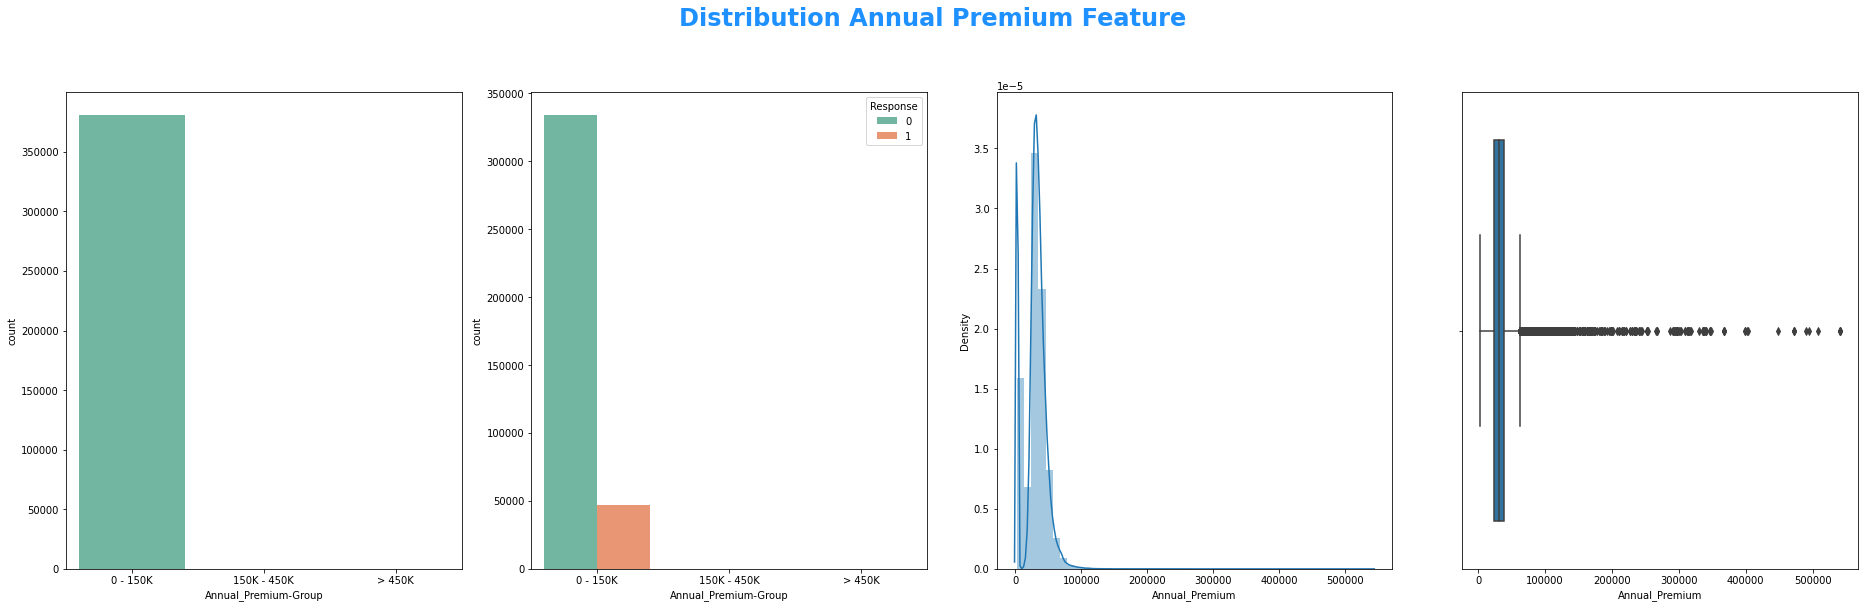

In [25]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

g = sns.countplot(trainGroup['Annual_Premium-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(trainGroup['Annual_Premium-Group'], hue = trainGroup['Response'],palette=sns.color_palette("Set2"), ax=ax[1])
g = sns.distplot(train['Annual_Premium'], ax=ax[2])
g = sns.boxplot(train['Annual_Premium'], orient='v', ax=ax[3])

plt.suptitle('Distribution Annual Premium Feature',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');
	
fig.tight_layout();

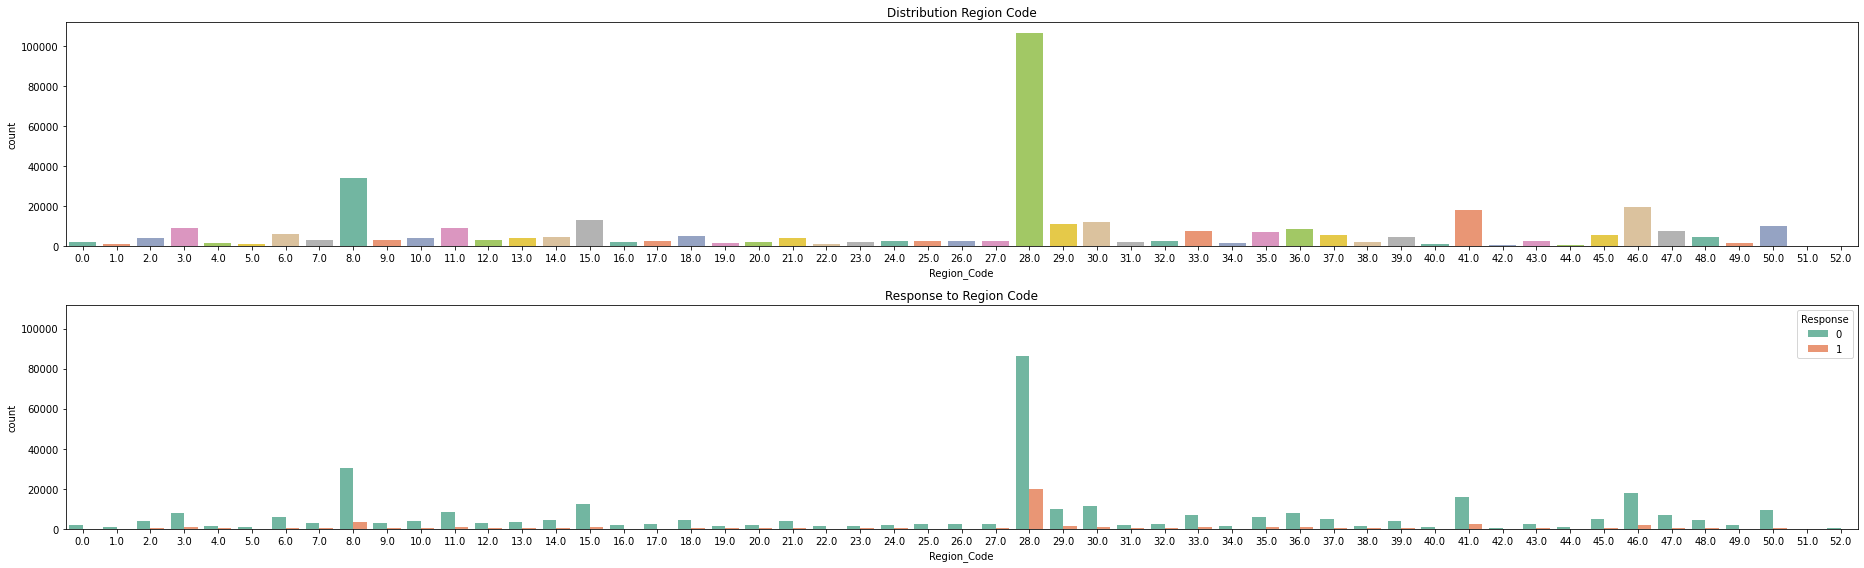

In [26]:
fig,ax = plt.subplots(2,figsize=(26,8),
                     sharey=True)

sns.countplot(train['Region_Code'],palette=sns.color_palette("Set2"), ax=ax[0])
ax[0].set_title('Distribution Region Code')

sns.countplot(train['Region_Code'],hue= train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])
ax[1].set_title('Response to Region Code')

fig.tight_layout();

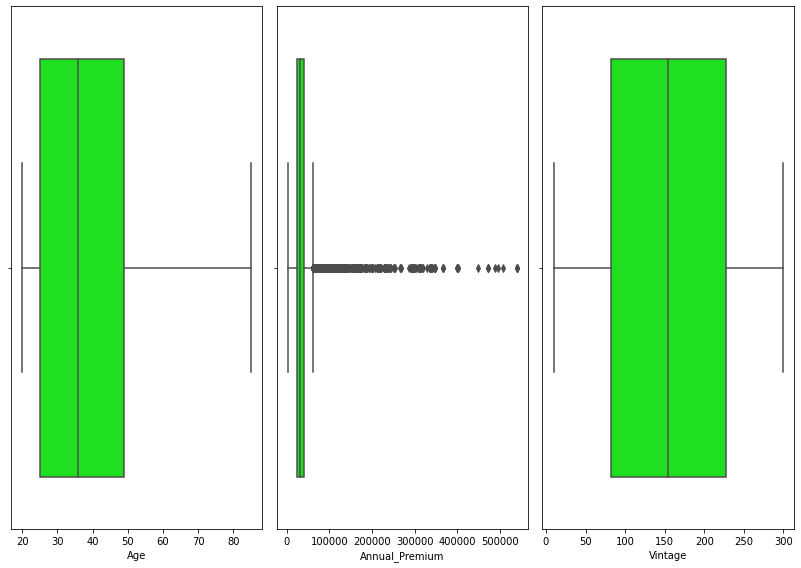

In [27]:
features = ['Age', 'Annual_Premium', 'Vintage']
plt.figure(figsize=(26, 8))

for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(train[features[i]],color='lime',orient='v')
    plt.tight_layout()

In [28]:
# data_num = train[features]
# k = len(data_num.columns)
# n = 3
# m = (k - 1) // n + 1
# fig, axes = plt.subplots(m, n, figsize=(n * 8, m * 3))
# for i, (name, col) in enumerate(data_num.iteritems()):
#     r, c = i // n, i % n
#     ax = axes[r, c]
#     col.hist(ax=ax, color='green')
#     ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
#     ax2.set_ylim(0)

# fig.tight_layout()
# plt.savefig('fig/numerical distplot.png')

<h1>FEATURE ENGINEERING</h1>

In [29]:
train_m = train.merge(trainGroup[['id', 'Age-Group', 'Vintage-Group', 'Annual_Premium-Group']], on='id')
train_m

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age-Group,Vintage-Group,Annual_Premium-Group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,36 - 50,200 - 300,0 - 150K
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,> 50,100 - 200,0 - 150K
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,36 - 50,0-100,0 - 150K
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,20-35,200 - 300,0 - 150K
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,20-35,0-100,0 - 150K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,> 50,0-100,0 - 150K
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,20-35,100 - 200,0 - 150K
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,20-35,100 - 200,0 - 150K
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,> 50,0-100,0 - 150K


In [30]:
train_dummies = pd.get_dummies(train_m[['Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Age-Group', 'Vintage-Group', 'Annual_Premium-Group']])
train_dummies.columns = [
    'Gender_Female', 
    'Gender_Male', 
    'Vehicle_Damage_No', 
    'Vehicle_Damage_Yes', 
    'Vehicle_Age_1-2_Year', 
    'Vehicle_Age_<1_Year',
    'Vehicle_Age_>2_Year',
    'Age_20_35',
    'Age_36_50',
    'Age_>50',
    'Vintage_0_100',
    'Vintage_100_200',
    'Vintage_200_300',
    'Annual_Premium_0_150K',
    'Annual_Premium_150K_450K',
    'Annual_Premium_>450K'  
]
train_d = pd.concat([train_m, train_dummies], axis=1)
train_d.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Vehicle_Age_>2_Year,Age_20_35,Age_36_50,Age_>50,Vintage_0_100,Vintage_100_200,Vintage_200_300,Annual_Premium_0_150K,Annual_Premium_150K_450K,Annual_Premium_>450K
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,...,1,0,1,0,0,0,1,1,0,0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,...,0,0,0,1,0,1,0,1,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,...,1,0,1,0,1,0,0,1,0,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,...,0,1,0,0,0,0,1,1,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,...,0,1,0,0,1,0,0,1,0,0


In [31]:
train_d = train_d.drop([
    'id', 
    'Gender', 
    'Vehicle_Age', 
    'Region_Code', 
    'Vehicle_Damage', 
    'Age', 
    'Vintage', 
    'Annual_Premium',
    'Age-Group',
    'Vintage-Group',
    'Annual_Premium-Group'
], axis=1)
train_d.head()

,Driving_License,Previously_Insured,Policy_Sales_Channel,Response,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,Vehicle_Age_1-2_Year,Vehicle_Age_<1_Year,Vehicle_Age_>2_Year,Age_20_35,Age_36_50,Age_>50,Vintage_0_100,Vintage_100_200,Vintage_200_300,Annual_Premium_0_150K,Annual_Premium_150K_450K,Annual_Premium_>450K
0,1,0,26.0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0
1,1,0,26.0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0
2,1,0,26.0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0
3,1,1,152.0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0
4,1,1,152.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0


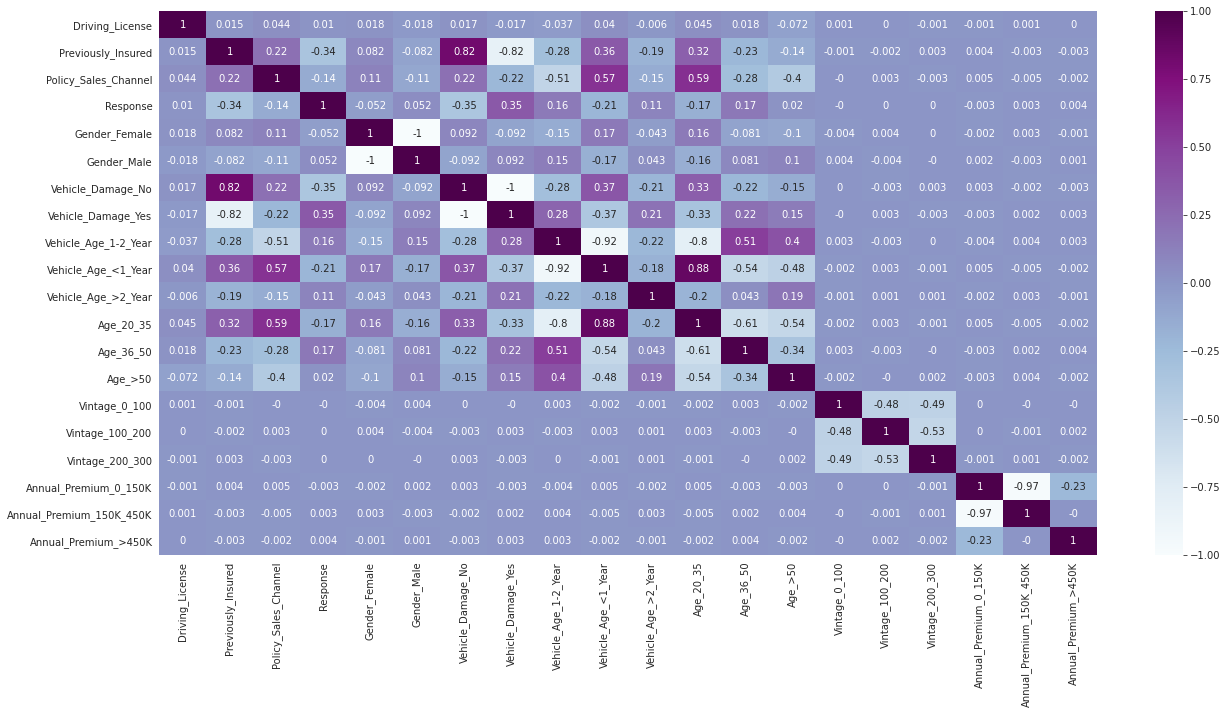

In [32]:
corr_= train_d.corr().round(3)
mask = np.zeros_like(corr_)
    
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(21, 10))
    ax = sns.heatmap(corr_, annot=True, cmap = "BuPu")

plt.tight_layout;
# plt.savefig('fig/matrix correlation.png');

In [33]:
train_d = train_d.drop([
    'Gender_Female', 
    'Vehicle_Damage_No', 
    'Vehicle_Age_<1_Year', 
    'Previously_Insured', 
    'Annual_Premium_150K_450K',
    'Age_20_35'
], axis=1)
train_d.head()

,Driving_License,Policy_Sales_Channel,Response,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2_Year,Vehicle_Age_>2_Year,Age_36_50,Age_>50,Vintage_0_100,Vintage_100_200,Vintage_200_300,Annual_Premium_0_150K,Annual_Premium_>450K
0,1,26.0,1,1,1,0,1,1,0,0,0,1,1,0
1,1,26.0,0,1,0,1,0,0,1,0,1,0,1,0
2,1,26.0,1,1,1,0,1,1,0,1,0,0,1,0
3,1,152.0,0,1,0,0,0,0,0,0,0,1,1,0
4,1,152.0,0,0,0,0,0,0,0,1,0,0,1,0


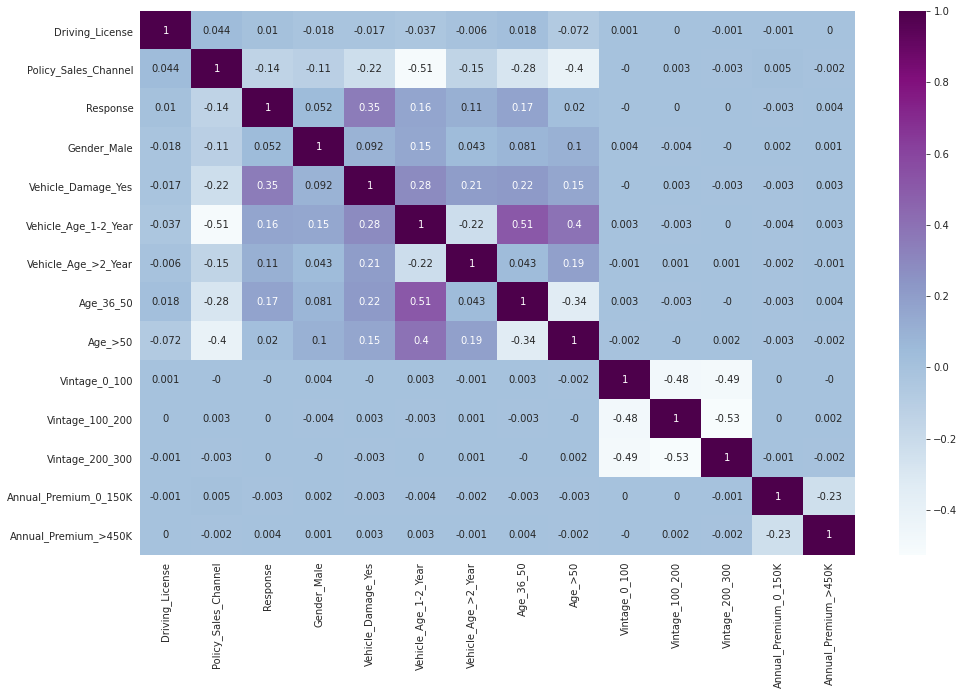

In [34]:
corr_= train_d.corr().round(3)
mask = np.zeros_like(corr_)
    
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr_, annot=True, cmap = "BuPu")

plt.tight_layout;
# plt.savefig('fig/matrix correlation.png');

<h1>CLASS IMBALANCE</h1>

In [35]:
trr = train_d['Response'].value_counts().to_frame()
trr['%'] = (trr['Response'] / len(train_d)) * 100
trr

,Response,%
0,334399,87.743664
1,46710,12.256336


In [37]:
from imblearn import over_sampling

X = train_d.drop(['Response'],axis=1)
y = train_d['Response']

# Oversampling
X_over, y_over = over_sampling.SMOTE().fit_resample(X, y)

In [38]:
train_over = pd.concat([X_over, y_over], axis=1)
train_over

,Driving_License,Policy_Sales_Channel,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2_Year,Vehicle_Age_>2_Year,Age_36_50,Age_>50,Vintage_0_100,Vintage_100_200,Vintage_200_300,Annual_Premium_0_150K,Annual_Premium_>450K,Response
0,1,26.0,1,1,0,1,1,0,0,0,1,1,0,1
1,1,26.0,1,0,1,0,0,1,0,1,0,1,0,0
2,1,26.0,1,1,0,1,1,0,1,0,0,1,0,1
3,1,152.0,1,0,0,0,0,0,0,0,1,1,0,0
4,1,152.0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668793,1,26.0,0,1,1,0,1,0,0,0,1,1,0,1
668794,1,124.0,1,1,1,0,0,1,0,0,1,1,0,1
668795,1,124.0,0,1,1,0,0,1,0,1,0,1,0,1
668796,1,157.0,1,0,1,0,0,0,0,0,1,1,0,1


In [39]:
print(pd.Series(y_over).value_counts())

1    334399
0    334399
Name: Response, dtype: int64


In [40]:
train_over[train_over['Response'] == 1].duplicated().sum()

329764

In [ ]:
train_over = train_over.drop_duplicates()
train_over.head()

In [ ]:
trr2 = train_over['Response'].value_counts().to_frame()
trr2['%'] = (trr2['Response'] / len(train_over)) * 100
trr2

In [ ]:
list(train_over)

<h2>PRE-PROCESSING</h2>

In [ ]:
# train.shape
# annualPrem = trains['Annual_Premium']
# maxValue = annualPrem.quantile(0.75) + (1.3 * (annualPrem.quantile(0.75) - annualPrem.quantile(0.25)))
# trains = trains.drop(trains[trains['Annual_Premium'] > maxValue].index)

In [ ]:
# features = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
# plt.figure(figsize=(15, 7))
# for i in range(0, len(features)):
#     plt.subplot(1, 7, i+1)
#     sns.boxplot(train[features[i]],color='lime',orient='v')
#     plt.tight_layout()
    
# plt.savefig('fig/numerical boxplot.png')

In [ ]:
# data_num = trains[features]
# k = len(data_num.columns)
# n = 3
# m = (k - 1) // n + 1
# fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
# for i, (name, col) in enumerate(data_num.iteritems()):
#     r, c = i // n, i % n
#     ax = axes[r, c]
#     col.hist(ax=ax, color='green')
#     ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
#     ax2.set_ylim(0)

# fig.tight_layout()
# plt.savefig('fig/numerical distplot.png')